# QUESTION:

Set random seed to 2019.
Randomly sample 1000 instances from the Normal Distribution with mean 10 and standard deviation 1.5 and store them in a variable called x_norm. Plot a histogram of x_norm.
Then, create a variable called means and store the mean obtained from 1000 random samples independent normal Normal Distributions, each with mean 10 and standard deviation 1.5. Plot a histogram of means. Post your two histogram plots (one of x_norm and one of means) in the thread.

_____

(array([  5.,  24.,  54., 151., 219., 227., 173.,  96.,  41.,  10.]),
 array([ 5.19243965,  6.11242028,  7.03240091,  7.95238155,  8.87236218,
         9.79234281, 10.71232344, 11.63230407, 12.55228471, 13.47226534,
        14.39224597]),
 <a list of 10 Patch objects>)

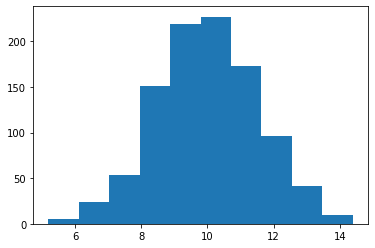

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=2019)
#mean
mu = 10
#standard deviation
sigma = 1.5
#1000 random samples from Normal Distribution using NumPy
x_norm = np.random.normal(mu, sigma, 1000)
#plot histogram of this ^
plt.hist(x_norm)

(array([  2.,   2.,  18.,  81., 210., 297., 239.,  96.,  45.,  10.]),
 array([ 3.79103824,  4.87830927,  5.9655803 ,  7.05285133,  8.14012236,
         9.22739339, 10.31466441, 11.40193544, 12.48920647, 13.5764775 ,
        14.66374853]),
 <a list of 10 Patch objects>)

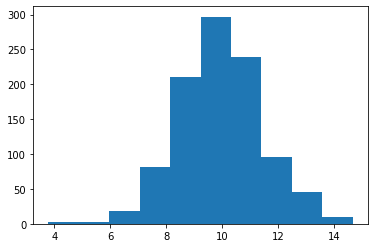

In [3]:
#set "means" variable using x_norm mean, x_norm standard deviation, with 1000 random samples
means = np.random.normal(x_norm.mean(), x_norm.std(), 1000)
#plot histogram of this ^
plt.hist(means)

### ALTERNATIVE METHOD OF SOLVING THIS PROBLEM:

Text(0.5, 1.0, 'Histogram of means')

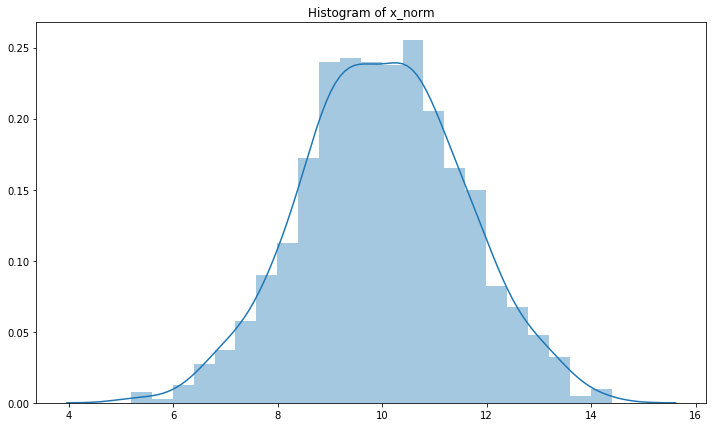

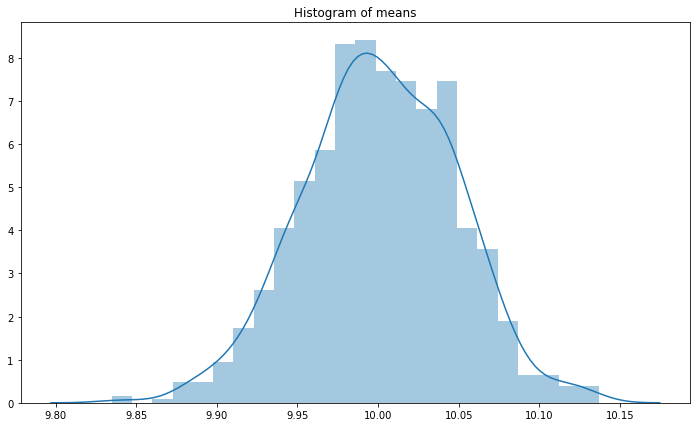

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Random seed as 2019
np.random.seed(2019) 
#Randomly sample 1000 instances from the Normal Distribution with mean 10 and standard deviation 1.5 and store them in a variable called x_norm
x_norm = np.random.normal(10, 1.5, 1000) 
#Then, create a variable called means and store the mean obtained from 1000 random samples 
means = []
for i in range(1000):
    means.append(np.random.normal(10, 1.5, 1000).mean())
#Histogram of x_norm   
plt.figure(figsize=(12,7))
sns.distplot(x_norm)
plt.title('Histogram of x_norm')
# Histogram of means
plt.figure(figsize=(12,7))
sns.distplot(means)
plt.title('Histogram of means')

# Next Warm-Up

Yesterday, we created the variables x_norm and means and plotted their respective histograms. Now, overlay the two histograms such that both of them are clearly visible (change color density). What do you observe? What is the reason behind this phenomenon?

Bonus: Now repeat the same steps as you did with the normal distribution, but this time for the Chi-Square distribution with 4 degrees of freedom. This will entail creating variables chi_square and means. What do you observe?

In [5]:
# plt.hist(x_norm, histtype='stepfilled', alpha=0.5, density=True, bins=40, label='x')
# plt.hist(means, histtype='stepfilled', alpha=0.5, density=True, bins=40, label='y')
# plt.legend(loc='upper right')
# plt.show

### Solution

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

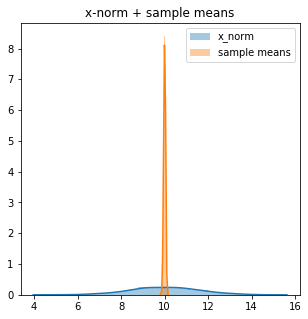

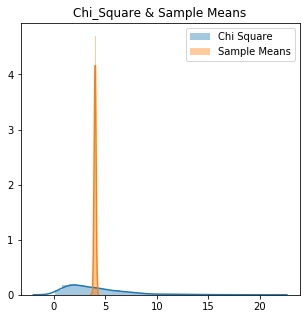

In [23]:
#overlay both the x-norm and sample means histograms
#the sample means of x-norm are in a much smaller range of x-values than the x-norm, in a normal distribution. (CLT)
np.random.seed(2019)
x_norm = np.random.normal(10, 1.5, 1000)
means = []
for i in range(0,1000):
    means.append(np.random.normal(10, 1.5, 1000).mean())
plt.figure(figsize=(5,5))
sns.distplot(x_norm, label='x_norm')
sns.distplot(means, label='sample means')
plt.title('x-norm + sample means')
plt.legend()

#Bonus work - overlay the chi square and sample means of chi square histograms.
#the sample means of chi square are in a smaller range of x-values than chi square, in a normal distribution.
np.random.seed(2019)
chi_square = np.random.chisquare(4, 1000)
means = []
for i in range(0,1000):
    means.append(np.random.chisquare(4, 1000).mean())
plt.figure(figsize=(5,5))
sns.distplot(chi_square, label='Chi Square')
sns.distplot(means, label='Sample Means')
plt.title('Chi_Square & Sample Means')
plt.legend()

On Monday, we created variables called x_norm and means. We will be working with the same variables today. (Recall that we set the seed to 2019)
Get bootstrap samples from x_norm and store the means of all these samples in the variable boot_means.
Plot histogram overlays of means and boot_means. What do you observe?
Find the mean and standard deviation of both means and boot_means. What does this exercise tell you about the bootstrap samples?

'This is the mean of means'

10.000849980641917

'This is the mean of boot_means'

10.039591514447688

'This is the standard deviation of means'

0.04700298392860694

'This is the standard deviation of boot_means'

1.5461956613220313

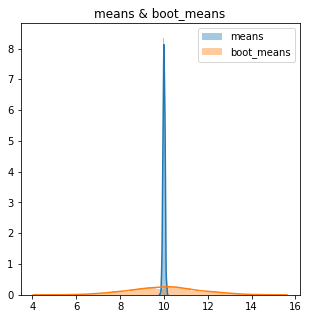

In [28]:
#set x_norm, set random seed to 2019, set means to empty list to append to
x_norm = np.random.normal(10, 1.5, 1000)
np.random.seed(2019)
means = []

#Randomly sample 1000 instances from the Normal Distribution with mean 10 and standard deviation 1.5, get the mean, and store them in a variable called means
for i in range(0,1000):
    means.append(np.random.normal(10, 1.5, 1000).mean())

#bootstrapping x_norm using scikit learn resample library
from sklearn.utils import resample
boot_means = resample(x_norm, replace = True, n_samples = 1000)

#display means and standard deviations
display('This is the mean of means')
display(np.mean(means))
display('This is the mean of boot_means')
display(boot_means.mean())
display('This is the standard deviation of means')
display(np.std(means))
display('This is the standard deviation of boot_means')
display(boot_means.std())

#plot histograms of means and boot_means
plt.figure(figsize=(5,5))
sns.distplot(means, label='means')
sns.distplot(boot_means, label='boot_means')
plt.title('means & boot_means')
plt.legend()

It seems that the boot_means sample has a much larger "spread" with thicker tails than the "means" distribution - which means a much larger standard deviation. The means of both distibutions are just about the same in this instance. This exercise tells us that bootstrapped samples are generally very representative of the original samples that we took (i.e. x_norm). So if we have a bad sample, then our bootstrapped sample will only compound the error. But if the sample data is good, then bootstrapping will be a reliable option.